C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ระบุน้ำหนักของผ้า 0 - 20 กิโลกรัม :15
ระบุบริมาณของผ้า 0 - 1.5 ลูกบาศก์เมตร :1


C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ความเร็วของการหมุนมอเตอร์ที่เหมาะสมต่อการซักผ้า คือ ระดับ : 7.471465080908569


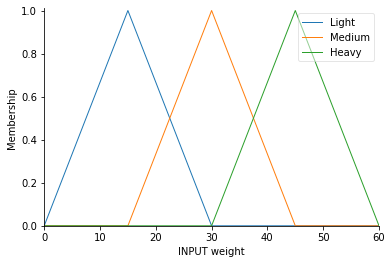

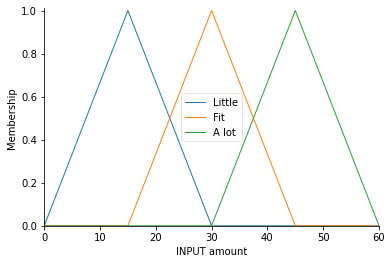

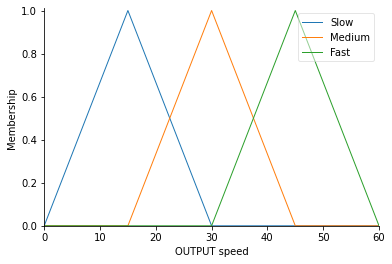

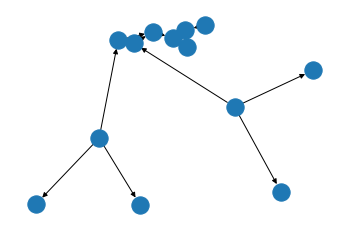

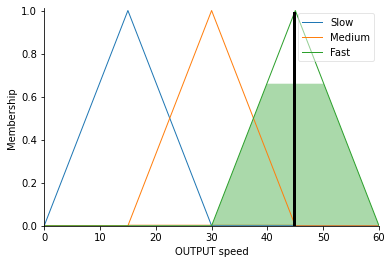

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
weight = ctrl.Antecedent(np.arange(0, 61, 1), 'INPUT weight')
amount = ctrl.Antecedent(np.arange(0, 61, 1), 'INPUT amount')
speed = ctrl.Consequent(np.arange(0, 61, 1), 'OUTPUT speed')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# weight.automf(3)
# amount.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
weight['Light'] = fuzz.trimf(weight.universe, [0, 15, 30])
weight['Medium'] = fuzz.trimf(weight.universe, [15, 30, 45])
weight['Heavy'] = fuzz.trimf(weight.universe, [30, 45, 60])

amount['Little'] = fuzz.trimf(amount.universe, [0, 15, 30])
amount['Fit'] = fuzz.trimf(amount.universe, [15, 30, 45])
amount['A lot'] = fuzz.trimf(amount.universe, [30, 45, 60])

speed['Slow'] = fuzz.trimf(speed.universe, [0, 15, 30])
speed['Medium'] = fuzz.trimf(speed.universe, [15, 30, 45])
speed['Fast'] = fuzz.trimf(speed.universe, [30, 45, 60])
# You can see how these look with .view()
weight.view()
amount.view()
speed.view()

rule1 = ctrl.Rule(weight['Light'] & amount['Little'], speed['Slow'])
rule2 = ctrl.Rule(weight['Medium'] & amount['Fit'], speed['Medium'])
rule3 = ctrl.Rule(weight['Heavy'] & amount['A lot'], speed['Fast'])
rule4 = ctrl.Rule(weight['Light'] & amount['A lot'], speed['Medium'])
rule5 = ctrl.Rule(weight['Heavy'] & amount['Little'], speed['Fast'])

rule1.view()
speedping_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5])
speedping = ctrl.ControlSystemSimulation(speedping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)

w = input("ระบุน้ำหนักของผ้า 0 - 20 กิโลกรัม :")
a = input("ระบุบริมาณของผ้า 0 - 1.5 ลูกบาศก์เมตร :")
W = int(w)
A = float(a)
speedping.input['INPUT weight'] = int(W)*3-0.1
speedping.input['INPUT amount'] = int(A*10)*4-0.1

# Crunch the numbers
speedping.compute()
speed.view(sim=speedping)
print("ความเร็วของการหมุนมอเตอร์ที่เหมาะสมต่อการซักผ้า คือ ระดับ :",speedping.output['OUTPUT speed']/6)
